# Fundamentos de Machine Learning 

Neste capítulo, exploraremos os conceitos básicos de *Machine Learning (ML)* baseado no Capítulo 2 do livro *Modern applications of machine learning in quantum sciences* {cite:p}`machinelearning2025` com foco especial nas suas conexões com **otimização** e **generalização**. Este documento introduz os conceitos fundamentais do aprendizado de máquina (ML), começando por defini-lo como um problema de otimização. Vamos explorar as funções de perda, como o Erro Quadrático Médio (MSE) e a Entropia Cruzada (CE), que quantificam os erros dos modelos, e discute os métodos de otimização baseados em gradiente, como o Gradiente Descendente Estocástico (SGD), para ajustar os parâmetros do modelo. O texto do livro também aborda a generalização, a capacidade do modelo de fazer previsões precisas em dados novos e não vistos, e técnicas de regularização para evitar o sobreajuste. Além disso, apresenta uma visão probabilística do ML, explicando como os modelos podem estimar distribuições de probabilidade usando o princípio da máxima verossimilhança e o teorema de Bayes, e diferencia modelos de ML padrão (como regressão linear e máquinas de vetores de suporte) de redes neurais profundas (DNNs), incluindo CNNs, Autoencoders e ARNNs. Finalmente, veremos sobre o algoritmo de retropropagação, essencial para o treinamento eficiente de DNNs.

## Aprendizado como um Problema de Otimização

ML é capaz de resolver diversas tarefas (por exemplo, **classificação** ou **regressão**) e existem diferentes maneiras para a máquina acessar os dados. O elemento final essencial é um **modelo** que aprende a resolver a tarefa designada com os dados disponíveis. Em termos gerais, um modelo é uma **função dos dados de entrada**, $f(x)$, cuja saída é interpretada como uma **previsão** para esses dados.

A forma da saída depende da tarefa em questão. Por exemplo, pode ser uma classe de um conjunto discreto de classes possíveis em uma tarefa de classificação, ou um valor contínuo (como um tensor proveniente de uma distribuição alvo contínua) em uma tarefa de regressão. Encontrar a função que proporciona o melhor mapeamento entre os dados e o resultado desejado para uma tarefa específica é o **cerne do ML**.

Começamos definindo uma parametrização específica para um modelo (função). Por exemplo, podemos ter 

$$f(\mathbf{x}) = \mathbf{w}^\intercal \mathbf{x} + \mathbf{b}, \ \ \text{ com}\ \ \theta \supset \{\mathbf{w}, \mathbf{b}\}$$

onde os parâmetros do modelo são $\theta = \{\mathbf{w}, \mathbf{b}\}$. O conjunto de todas as possíveis parametrizações dessa função forma o que chamamos de **classe de hipóteses** (ou espaço de hipóteses). A Seção 2.4 apresentará exemplos específicos de classes de hipóteses, mas por enquanto, focaremos no processo de aprendizado em si.

Os esquemas de aprendizado mencionados – **aprendizado supervisionado, não supervisionado ou por reforço** – compartilham o mesmo processo fundamental: encontrar um **modelo ótimo** $\hat{f} \equiv f_{\theta^* }$ com **parâmetros ótimos** $\theta^*$ dentro do espaço de hipóteses. Este modelo ótimo é aquele que minimiza uma **função de perda alvo** ou maximiza uma métrica de desempenho do modelo. Para maior clareza ao longo desta seção, vamos nos concentrar na **minimização da função de perda**, $L$, que intuitivamente atua como uma **penalidade pelos erros** cometidos pelo modelo. 

> Máquinas "aprendem" minimizando a função de perda dos dados de treinamento, ou seja, todos os dados
> acessíveis ao modelo de ML durante o processo de aprendizado. A minimização é feita
> ajustando os parâmetros do modelo. A fórmula da função de perda varia entre as tarefas
> e há uma certa liberdade sobre como ela pode ser escolhida. Em geral, a função de perda
> compara as previsões do modelo ou uma solução desenvolvida com a realidade ou as expectativas.
> Portanto, o aprendizado se torna um problema de otimização. 

Popular exemplos de funções de perda incluem o **erro quadrático médio (MSE - Mean-Squared Error)** e a **entropia cruzada (CE - Cross-Entropy)**, usadas para problemas de **regressão supervisionada** e **classificação**, respectivamente. A saída da função de perda depende do modelo (que entra nas fórmulas através das previsões) e do conjunto de dados. Elas também são normalizadas pelo número de pontos de dados $n$ para comparar seus valores entre problemas com diferentes tamanhos de conjunto de dados.

A MSE é uma função de perda popular, herdada de problemas de regressão linear, e é definida como:

$$ \mathcal{L}_{\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(\mathbf{x}_i))^2. $$

O MSE surge naturalmente de uma perspectiva probabilística, particularmente da maximização da verossimilhança sob a suposição de que os alvos são amostrados de uma distribuição Gaussiana.
 
Outra função de perda para regressão é o Erro Médio Absoluto (MAE - Mean Absolute Error), que é mais sensível a pequenos erros do que o MSE. Os dois são mostrados na Figura a seguir.

In [1]:
import fitz  # PyMuPDF
from IPython.display import SVG, display
import re

def plot_pdf_as_svg(pdf_path, zoom=2.0, width=800, height=600):
    """
    Lê um PDF de uma página (gráfico), aplica zoom interno (matrix) no conteúdo,
    e também ajusta a tela externa (width, height) do SVG final.
    """
    doc = fitz.open(pdf_path)
    page = doc[0]

    # Cria matriz de zoom
    matrix = fitz.Matrix(zoom, zoom)

    # Gera SVG com conteúdo escalado
    svg_text = page.get_svg_image(matrix=matrix)

    # Substitui a tag <svg> para ajustar a moldura externa (pixels finais)
    svg_tag_pattern = r'<svg\b[^>]*>'
    new_svg_tag = (f'<svg xmlns="http://www.w3.org/2000/svg" '
                   f'xmlns:xlink="http://www.w3.org/1999/xlink" '
                   f'width="{width}" height="{height}">')
    svg_text = re.sub(svg_tag_pattern, new_svg_tag, svg_text, count=1)

    # Exibe
    display(SVG(svg_text))

    doc.close()


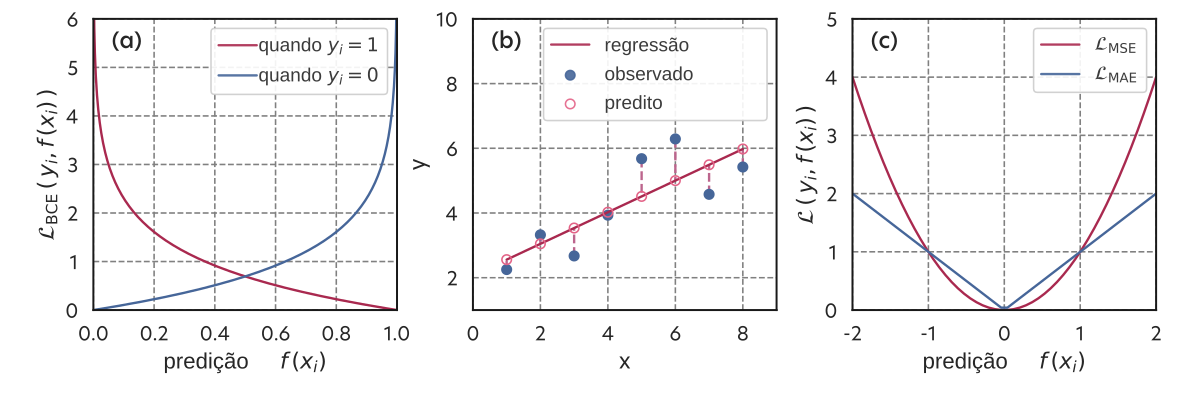

In [2]:
plot_pdf_as_svg('../../_static/fig_2_1.pdf', zoom=2.7, width=1200, height=400  ) 

*Figura 2.1 da Ref.{cite:p}`machinelearning2025`: Exemplos de funções de perda.*

*(a) Gráfico da entropia cruzada binária (cross-entropy) para um único ponto de dado $ x_i $, considerando que o rótulo verdadeiro $ y_i $ seja 0 (linha azul) ou 1 (linha roxa).*

*(b) Intuição por trás das funções de perda usadas em problemas de regressão. As linhas tracejadas representam as diferenças entre os rótulos reais $ y_i $ e os valores previstos pelo modelo $ f(x_i) $.*

*(c) Gráficos do Erro Quadrático Médio (MSE) em roxo e do Erro Absoluto Médio (MAE) em azul, para um único ponto de dado $ x_i $, quando o rótulo verdadeiro $ y_i = 0 $.*


### Entropia Cruzada (CE - Cross-Entropy)
A Entropia Cruzada é uma função de perda com raízes na teoria da informação e conexões com a teoria da probabilidade, usada para problemas de classificação supervisionada. Temos:

A **Entropia Cruzada Binária (BCE - Binary Cross-Entropy)**: Conhecida também como log loss, é usada para tarefas de classificação binária.
 
$$ L_{BCE} = - \frac{1}{n} \sum_{i=1}^{n} [y_i \cdot \log(f(x_i)) + (1-y_i) \cdot \log(1-f(x_i))],$$
 
E a **Entropia Cruzada Categórica (CCE - Categorical Cross-Entropy):** Utilizada para classificação multi-classe. Esta fórmula requer a representação dos rótulos em um formato chamado one-hot encoding. Por exemplo, em um problema com $K$ classes, um rótulo $y_i$ é codificado como um vetor de $K$ elementos onde todos são zero, exceto um '1' na posição correspondente à classe do exemplo (e.g., $y_i = [0, 0, 1, ..., 0]$ para a terceira classe). A equação é
 
$$ L_{CCE} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{K} y_{i,c} \cdot \log(f(x_i)). $$

A minimização da Entropia Cruzada é equivalente a minimizar a divergência de Kullback-Leibler (KL) entre a distribuição de probabilidade de referência e a distribuição do modelo.
A saída da função de perda depende do modelo (que entra nas fórmulas através das previsões) e do conjunto de dados. As funções de perda são tipicamente normalizadas pelo número de pontos de dados ($n$) para permitir a comparação de seus valores entre problemas com diferentes tamanhos de conjunto de dados.
É crucial entender que, para a otimização baseada em gradiente, as medidas de desempenho precisam ser suaves e diferenciáveis. Essas condições distinguem as funções de perda de outras métricas de avaliação, como acurácia, recall ou precisão. Por exemplo, a acurácia (razão entre exemplos classificados corretamente e o tamanho do conjunto de dados) pode ser uma medida mais intuitiva de desempenho para classificação, mas não é diferenciável, o que a torna inadequada para otimização baseada em gradientes.
Uma vez que uma função de perda é escolhida, ela pode ser minimizada através da variação dos parâmetros do modelo de ML, utilizando qualquer método de otimização. Em geral, o mínimo da função de perda pode ser encontrado por construção analítica ou por métodos de otimização, que podem ser baseados em gradiente ou sem gradiente.

Um exemplo popular de método baseado em gradiente é o de descida do gradiente (gradient descent). A otimização geralmente começa em um ponto aleatório no espaço de parâmetros do modelo (ou seja, com parâmetros inicializados aleatoriamente). 

> As etapas do processo de descida do gradiente são:
> 
> 1. Com o modelo e seus parâmetros iniciais, faça previsões sobre os dados de treinamento.
> 
> 2. A partir dessas previsões e dos valores reais, calcule a função de perda.
> 
> 3. Calcule os gradientes da função de perda em relação a cada parâmetro do modelo.
> 
> 4. Atualize os parâmetros subtraindo os gradientes respectivos, multiplicados por uma taxa de aprendizado ($\eta$). A intuição é que a descida do  gradiente atualiza os parâmetros do modelo dando passos na direção oposta ao gradiente, que indica onde o valor da função cresce. 
> 
> 5.Essas etapas são repetidas até que o mínimo seja alcançado, e cada repetição é chamada de época (epoch).

A fórmula de atualização para um parâmetro $\theta_j$ é: 

$$\theta_j := \theta_j - \eta \frac{\partial L}{\partial \theta_j}.$$



### A Importância da Taxa de Aprendizado ($\eta$) e Hiperparâmetros

A taxa de aprendizado ($\eta$) controla o tamanho desses passos. A escolha de $\eta$ é crítica: tanto um $\eta$ muito grande (levando a "saltos" ou overshooting) quanto um $\eta$ muito pequeno (tornando a otimização lenta e necessitando de muitas épocas) podem dificultar a convergência. Encontrar uma $\eta$ ótima geralmente exige tentativa e erro, tornando-a um hiperparâmetro do processo de aprendizado. Hiperparâmetros são valores que controlam o processo de aprendizado (como a velocidade de convergência e a qualidade do mínimo) e são escolhidos pelo usuário, em contraste com os parâmetros do modelo que são derivados através do treinamento. O número total de épocas ou a escolha da função de perda também são exemplos de hiperparâmetros.
A otimização com descida do gradiente é muito eficiente quando a "paisagem de perda" (a representação dos valores de perda ao redor do espaço de parâmetros do modelo) é convexa. No entanto, especialmente para modelos de Deep Learning (DL), as paisagens de perda são frequentemente altamente não-convexas e exibem múltiplos mínimos locais. Para lidar com esses problemas, uma modificação popular da descida do gradiente é a descida do gradiente estocástica (SGD - Stochastic Gradient Descent). O SGD calcula a função de perda em cada época em mini-batches (subconjuntos) dos dados de treinamento, selecionados aleatoriamente. Essa estocasticidade resultante ajuda a escapar de pontos de sela e mínimos locais "estreitos". Além disso, calcular a função de perda e os gradientes apenas para um mini-batch, em vez de todo o conjunto de dados, proporciona uma aceleração computacional significativa para grandes conjuntos de dados.
Existem outras alterações populares ao SGD, como a inclusão de um termo de momento que considera as direções de atualização anteriores ou taxas de aprendizado adaptativas entre as épocas, culminando em otimizadores como o Adam. Métodos que incorporam a segunda derivada, como o algoritmo L-BFGS, também existem. Além dos métodos baseados em gradiente, há abordagens de otimização sem gradiente que são usadas quando os gradientes ou a própria função de perda são caros ou impossíveis de calcular, como algoritmos genéticos, otimização por enxame de partículas, busca aleatória e recozimento simulado.

Para realizar o método da descida do gradiente, é fundamental calcular o gradiente da função de perda ($L$) em relação a cada um dos parâmetros do modelo ($\nabla_\theta L$) antes de cada etapa de atualização. Existem diversas abordagens para computar essas derivadas.
 
**Derivadas Analíticas Manuais:** Poder-se-ia calcular as derivadas analiticamente "à mão". No entanto, esta abordagem é suscetível a erros e pode ser extremamente tediosa, especialmente para arquiteturas de redes neurais complexas.
 
**Aproximação Numérica:** Outra opção é aproximá-las numericamente com base em diferenças finitas.
 
**Diferenciação Automática (AD - Automatic Differentiation)**: Quando a preocupação é a avaliação numérica precisa das derivadas, e não sua forma simbólica, a Diferenciação Automática (AD) é uma excelente escolha.

### Diferenciação Automática (AD) e a Regra da Cadeia
A AD aproveita o fato de que os programas de computador que calculam a função de perda podem ser decompostos em uma sequência de operações aritméticas elementares (como adições ou multiplicações) e funções (como exponenciais ou seno). Assim, o valor numérico da derivada do programa (ou seja, da função de perda) pode ser calculado de forma automatizada e eficiente pela aplicação repetida de regras de diferenciação básicas predefinidas, como a regra da cadeia:

$$\frac{df(g(x))}{dx} = f'(g(x))g'(x).$$

É importante notar que a retropropagação (backpropagation), o algoritmo de escolha para o treinamento eficiente de Redes Neurais (NNs), é um caso especial de aplicação da AD em modo reverso a NNs.

### Desafios da Otimização e a Descida do Gradiente Estocástica (SGD)

O procedimento de otimização baseado na descida do gradiente é muito eficiente quando a "paisagem de perda" (a representação dos valores de perda no espaço de parâmetros do modelo) é convexa. No entanto, e especialmente para modelos de Deep Learning (DL), as paisagens de perda são frequentemente altamente não-convexas e geralmente apresentam múltiplos mínimos locais e pontos de sela. Isso levanta questões importantes:

1. Como evitar ficar preso em mínimos locais correspondentes a valores altos da função de perda ou em pontos de sela nessas paisagens?

2. Alguns mínimos são melhores que outros?

Para lidar com esses problemas, uma modificação popular do algoritmo de descida do gradiente é a Descida do Gradiente Estocástica (SGD - Stochastic Gradient Descent).
 
**Mini-batches:** O SGD calcula a função de perda em cada época em mini-batches (subconjuntos) dos dados de treinamento, selecionados aleatoriamente.
 
**Estocasticidade e Escape de Mínimos Locais:** A estocasticidade resultante ajuda a escapar de pontos de sela e mínimos locais "estreitos".
 
**Aceleração Computacional:** Calcular a função de perda e os gradientes apenas para um mini-batch, em vez de todo o conjunto de dados, proporciona uma aceleração computacional significativa para grandes conjuntos de dados. 

Dos pontos principais sobre a paisagem da função de perda em modelos de Machine Learning (ML), especialmente em Deep Learning (DL) têm-se:

### Análise de Mínimos Locais e Pontos de Sela em DL
 
A otimização de modelos de ML frequentemente leva a mínimos locais ou pontos de sela.
 
Para examinar esses pontos, é usada a Hessiana da função de perda de treinamento ($H_{θ^*}$), que é uma matriz de derivadas parciais de segunda ordem da função de perda em relação aos parâmetros do modelo, calculada no mínimo.
 
Os autovetores da Hessiana com os maiores autovalores positivos indicam as direções de subida mais íngreme em torno do mínimo. Uma alta curvatura nessas direções significa que os dados de treinamento determinam fortemente os parâmetros do modelo nessa direção.
 
É notável que, em modelos de ML, a grande maioria dos autovalores da Hessiana é próxima de zero, sugerindo direções "planas". Além disso, pequenos autovalores negativos também podem estar presentes, indicando direções com curvatura negativa. O texto sugere que mais informações sobre a Hessiana podem ser encontradas na seção 3.5.3.
 
Uma questão que surge é por que confiar em um modelo que não atinge o mínimo global. O texto esclarece que, na prática, para grandes redes, a maioria dos mínimos locais é equivalente e oferece desempenho similar no conjunto de teste. A probabilidade de encontrar um "mínimo ruim" (com alto valor de perda) é não-zero para redes pequenas, mas diminui rapidamente com o tamanho da rede. Tentar encontrar o mínimo global no conjunto de treinamento não é útil e pode levar a overfitting, ou seja, um desempenho muito melhor no treinamento do que no teste, o que é sinônimo de má generalização.

### Evoluções dos Métodos de Otimização Baseados em Gradiente
 
Até este ponto, a Descida do Gradiente Estocástica (SGD) era o único método baseado em gradiente descrito. O SGD, como discutido anteriormente em nossa conversa, envolve o cálculo da função de perda em mini-batches dos dados de treinamento a cada época, resultando em uma estocasticidade que ajuda a escapar de pontos de sela e mínimos locais estreitos, além de oferecer um ganho computacional.
 
#### Alterações populares no SGD

Alterações populares no SGD incluem:

A adição de um termo de momento, que considera as direções de atualização anteriores.

O uso de taxas de aprendizado adaptativas entre as épocas.

A combinação de ambos, culminando no amplamente utilizado otimizador Adam.
 
Outra ideia é incorporar a segunda derivada na regra de atualização, como feito pelo algoritmo L-BFGS (limited-memory Broyden–Fletcher–Goldfarb–Shanno).

#### Abordagens de Otimização Sem Gradiente (Gradient-Free)
 
Existem também métodos de otimização que não utilizam gradientes. Estes são particularmente úteis quando os gradientes ou a própria função de perda são caros ou impossíveis de calcular, por exemplo, na otimização de experimentos.
 
Exemplos notáveis incluem algoritmos genéticos, otimização por enxame de partículas, busca aleatória e recozimento simulado.
 
A Otimização Bayesiana (BO) é outro exemplo que será discutido em mais detalhes na seção 4.3 de  {cite:p}`machinelearning2025`.

### Implementação do Algoritmo de SGD

Abaixo temos o algoritmo de uma modificação do método de Descida do Gradiente, projetado para otimizar modelos de Machine Learning, especialmente em cenários com paisagens de função de perda (loss landscapes) não-convexas, comuns em Deep Learning. 

--------------------------------------------------------------------------------
**Algoritmo 1:** Descida do gradiente estocástico do minibatch (SGD)

**Requer:** Taxa de aprendizado $ \eta $  
Inicialize $ \theta $ com valores aleatórios  

**Para** epoch = 1 até no_epochs **faça**  
  Embaralhe $ \mathcal{D}_{\text{train}} $  

 **Para** i = 1 até m (onde m é o tamanho do minibatch) **faça**  
    $ x_i, y_i \sim \mathcal{D}_{\text{train}} $           ▹ Sorteie dados aleatórios sem reposição  
    $ \mathcal{L} \gets \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(y_i, f(x_i)) $      ▹ Calcule a função de perda no minibatch  
    $ (\nabla \mathcal{L})_j \gets \frac{\partial \mathcal{L}}{\partial \theta_j} $             ▹ Calcule os gradientes  
    $ \theta_j \gets \theta_j - \eta \frac{\partial \mathcal{L}}{\partial \theta_j} $             ▹ Atualize os parâmetros  
  **Fim para** 

 **Fim para**

**Retorne** $ \theta $

--------------------------------------------------------------------------------

Segue explicação sobre os termos presentes no algoritmo: 

1. **Requer:** Taxa de aprendizado $ \eta $  

Isso indica um pré-requisito para o algoritmo: a taxa de aprendizado ($\eta$).

A taxa de aprendizado é um hiperparâmetro crucial que controla o tamanho dos passos que o algoritmo de otimização dá em direção ao mínimo da função de perda.

Uma $\eta$ muito pequena torna o treinamento lento e prolongado, enquanto uma $\eta$ muito grande pode fazer a otimização "pular" o mínimo (overshoot), dificultando ou impedindo a convergência. Um valor ótimo de $\eta$ é essencial para uma convergência eficiente e geralmente é encontrado por tentativa e erro.

2. Inicialize $ \theta $ com valores aleatórios:
 
Antes de iniciar o processo de aprendizado, os parâmetros do modelo ($\theta$) são inicializados com valores aleatórios.
 
Na prática, esses parâmetros são geralmente inicializados aleatoriamente, mas com restrições para terem média zero e variância constante entre as camadas, a fim de evitar problemas com gradientes que desaparecem ou explodem.

3. **Para** epoch = 1 até no_epochs **faça** 

Este é o laço externo do algoritmo, que define o número total de épocas.

Uma época refere-se a uma repetição completa do processo de atualização dos parâmetros do modelo, que envolve percorrer todo o conjunto de dados de treinamento.

4. Embaralhe $ \mathcal{D}_{\text{train}} $  

Dentro de cada época, o conjunto de dados de treinamento (Dtrain) é embaralhado.

Isso garante que os mini-batches selecionados em cada iteração sejam aleatórios, o que é fundamental para a "estocasticidade" do SGD e ajuda a evitar que o algoritmo fique preso em mínimos locais ou pontos de sela.

5. **Para** i = 1 até m (onde m é o tamanho do minibatch) **faça**  

Este é o laço interno, onde o treinamento é realizado em mini-batches dos dados.

$m$ representa o tamanho de cada mini-batch. Em vez de usar todo o conjunto de dados (como na Descida do Gradiente Batch), o SGD calcula a perda e os gradientes em pequenos subconjuntos de dados.

6. $ x_i, y_i \sim \mathcal{D}_{\text{train}} :$

Dentro de cada iteração do laço interno, pontos de dados aleatórios (xi, yi) são extraídos do conjunto de treinamento para formar o mini-batch atual.

O fato de serem "aleatoriamente selecionados" e "sem substituição" contribui para a natureza estocástica do SGD.

7. $ \mathcal{L} \gets \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(y_i, f(x_i)) :$

A função de perda (L) é calculada para o mini-batch atual.

A função de perda quantifica o "erro" ou "penalidade" das previsões do modelo em comparação com os valores reais (yi). Exemplos populares incluem Erro Quadrático Médio (MSE) para regressão e Entropia Cruzada (CE) para classificação.

8. $ (\nabla \mathcal{L})_j \gets \frac{\partial \mathcal{L}}{\partial \theta_j} :$

Os gradientes da função de perda (∇L) em relação a cada parâmetro do modelo ($\theta_j$) são calculados para o mini-batch.

O gradiente indica a direção de maior crescimento da função de perda. Para minimizá-la, move-se na direção oposta ao gradiente.

Para Redes Neurais (NNs), o cálculo desses gradientes é feito eficientemente por um algoritmo chamado retropropagação (backpropagation), que é uma forma de diferenciação automática.

9. $ \theta_j \gets \theta_j - \eta \frac{\partial \mathcal{L}}{\partial \theta_j} :$

Os parâmetros do modelo ($\theta_j$) são atualizados.

Esta é a regra de atualização central da descida do gradiente: o parâmetro é ajustado subtraindo o gradiente (multiplicado pela taxa de aprendizado $\eta$) do valor atual do parâmetro. Isso move os parâmetros na direção que minimiza a função de perda.

10. **Fim para** (dois blocos):

Fechamento dos laços interno e externo.

11. **Retorne** $ \theta :$

Após o número especificado de épocas, o algoritmo retorna os parâmetros do modelo otimizados (θ).
Benefícios do SGD:
A utilização de mini-batches e a consequente estocasticidade do SGD trazem dois benefícios principais:

• Escape de Mínimos Locais e Pontos de Sela: O fato de os gradientes apontarem em várias direções a cada época ajuda o algoritmo a escapar de pontos de sela e mínimos locais "estreitos" na complexa paisagem de perda de modelos de Deep Learning, que é tipicamente não-convexa e possui múltiplos mínimos locais.

• Eficiência Computacional: Calcular a função de perda e os gradientes apenas para um mini-batch, em vez de para todo o conjunto de dados, proporciona um ganho significativo de velocidade computacional para grandes conjuntos de dados.
Este algoritmo é a base para muitos dos otimizadores modernos em Machine Learning, incluindo alterações populares como a inclusão de um termo de momento ou taxas de aprendizado adaptativas (como no otimizador Adam).

## Generalização e Regularização

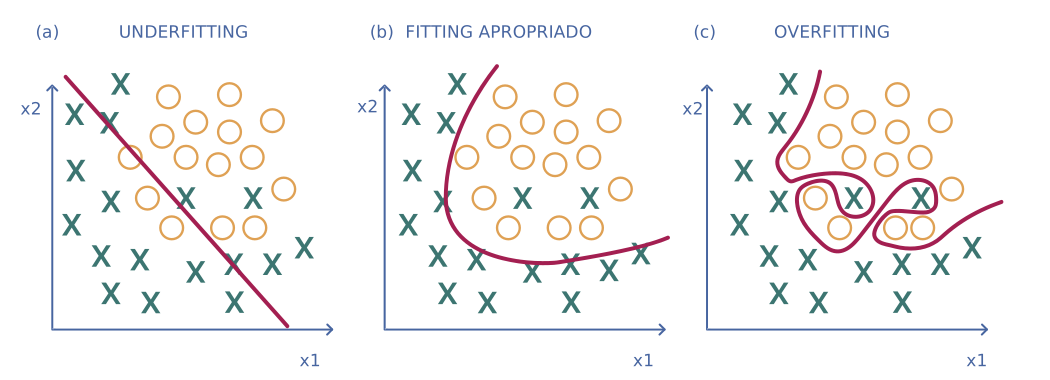

In [3]:
plot_pdf_as_svg('../../_static/fig_2_3.pdf', zoom=2.4, width=1050, height=380  ) 

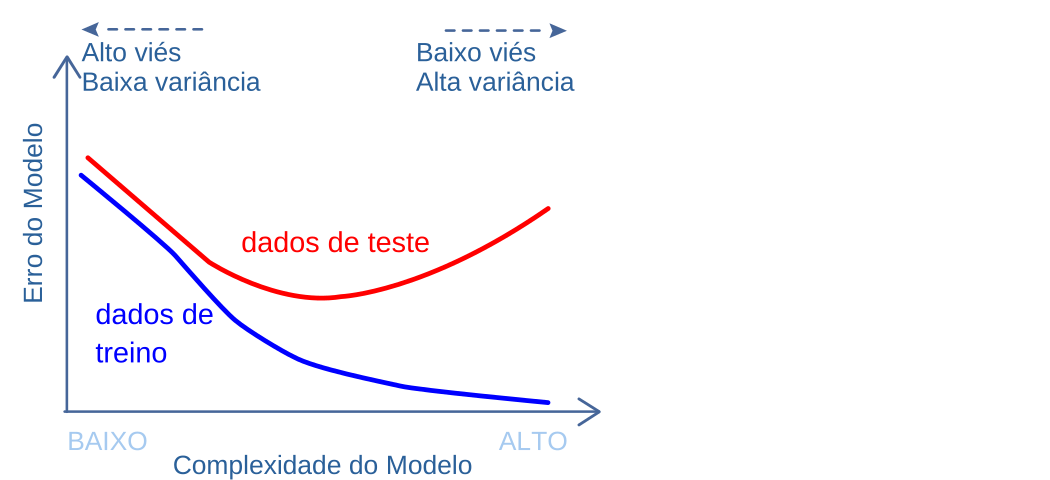

In [4]:
plot_pdf_as_svg('../../_static/fig_2_4.pdf', zoom=2.4, width=1050, height=480  )

## Visão probabilística em Machine Learning

To do